# Image Data Augmentation on Fashion-MNIST

### Load and check the data using the data.py file

In [5]:
import sys
sys.path.append("..")

from src.data import load_data

(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print("Range:", x_train.min(), x_train.max())

Train: (54000, 28, 28, 1)
Val: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Range: 0.0 1.0


#### Visual Sanity Check

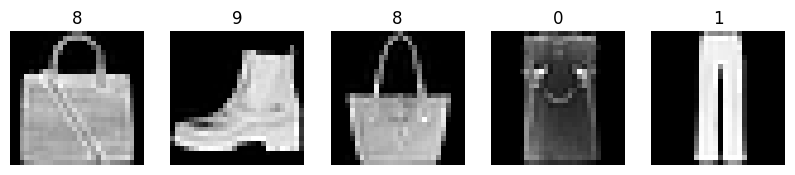

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(str(y_train[i]))
    ax.axis("off")

plt.show()


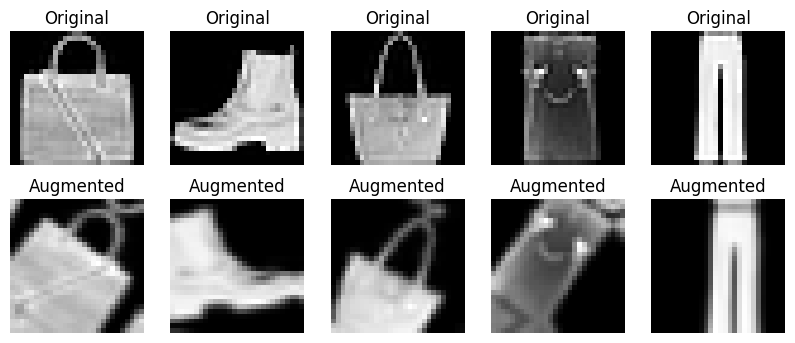

In [7]:
from src.augment import build_augmentation
import matplotlib.pyplot as plt

augmentation = build_augmentation()

sample_images = x_train[:5]

augmented_images = augmentation(sample_images, training=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(5):
    axes[0, i].imshow(sample_images[i].squeeze(), cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    axes[1, i].imshow(augmented_images[i].numpy().squeeze(), cmap="gray")
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.show()

In [8]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
model_no_aug = tf.keras.models.load_model("../models/best_model.h5")
model_aug = tf.keras.models.load_model("../models/best_model_augmented.h5")



Evaluating CNN Without Augmentation


Test Accuracy: 0.9201
Test Loss: 0.2702
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.87      0.88      0.88      1000
           5       0.98      0.99      0.99      1000
           6       0.81      0.71      0.76      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



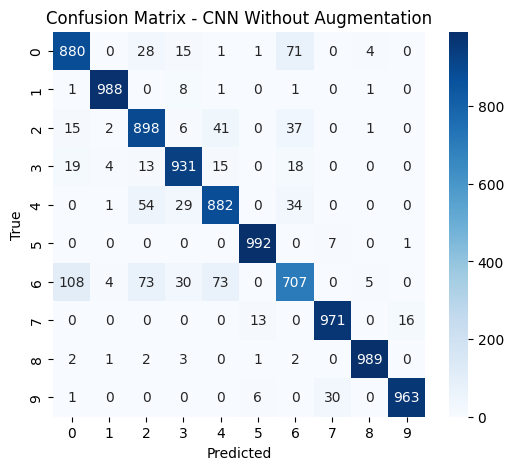


Evaluating CNN With Augmentation


Test Accuracy: 0.8920
Test Loss: 0.3189
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.85      0.91      0.88      1000
           4       0.83      0.81      0.82      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.67      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.95      0.99      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



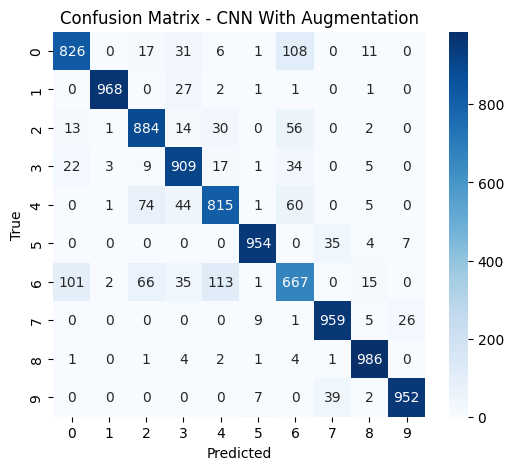

In [10]:
import sys
# Add src folder to Python path (relative to notebook)
sys.path.append("../src")

# Now import your function
from train_eval import evaluate_model


# Evaluate without augmentation
acc_no_aug = evaluate_model("../models/best_model.h5", x_test, y_test, "CNN Without Augmentation")

# Evaluate with augmentation
acc_aug = evaluate_model("../models/best_model_augmented.h5", x_test, y_test, "CNN With Augmentation")


In [11]:
# Step 6: Final comparison
print("\n" + "="*50)
print("Final Comparison")
print("="*50)
print(f"Accuracy without augmentation: {acc_no_aug:.4f}")
print(f"Accuracy with augmentation:    {acc_aug:.4f}")

if acc_aug > acc_no_aug:
    print("Data augmentation improves generalization.")
elif acc_aug < acc_no_aug:
    print("No augmentation performs slightly better.")
else:
    print("Both models perform equally well.")


Final Comparison
Accuracy without augmentation: 0.9201
Accuracy with augmentation:    0.8920
No augmentation performs slightly better.
